### This jupyter notebook is to unit-test CFE model run

## Preparation

In [4]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [5]:
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/forcing_daily_1998_2001.csv", 
    "time_step_size": 86400,
    "catchment_area_km2": 46.65, 
    "soil_params": {
        "bb": 2.553518, 
        "satdk": 0.000147, 
        "satpsi": 0.007217, 
        "slop": 0.552437, 
        "smcmax": 0.38771, 
        "wltsmc": 0.252464, 
        "D": 1
        }, 
        "gw_scheme": "Exponential",
        "max_gw_storage": 343.449845, 
        "Cgw": 8.484384, 
        "expon": 1.821161, 
        "K_nash": 0.1, 
        "refkdt":3.620361, 
        "trigger_z_fact": 0.75, 
        "alpha_fc":0.13743, 
        "K_lf": 0.000424, 
        "num_nash_storage": 2, 
        "giuh_ordinates": [0.25, 0.5, 0.25], 
        "stand_alone": 1, 
        "unit_test": 1, 
        "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/test_daily_1998_2001_sm_basinavg.csv"
        }

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

GW converged <1% after warm-up iteration 1


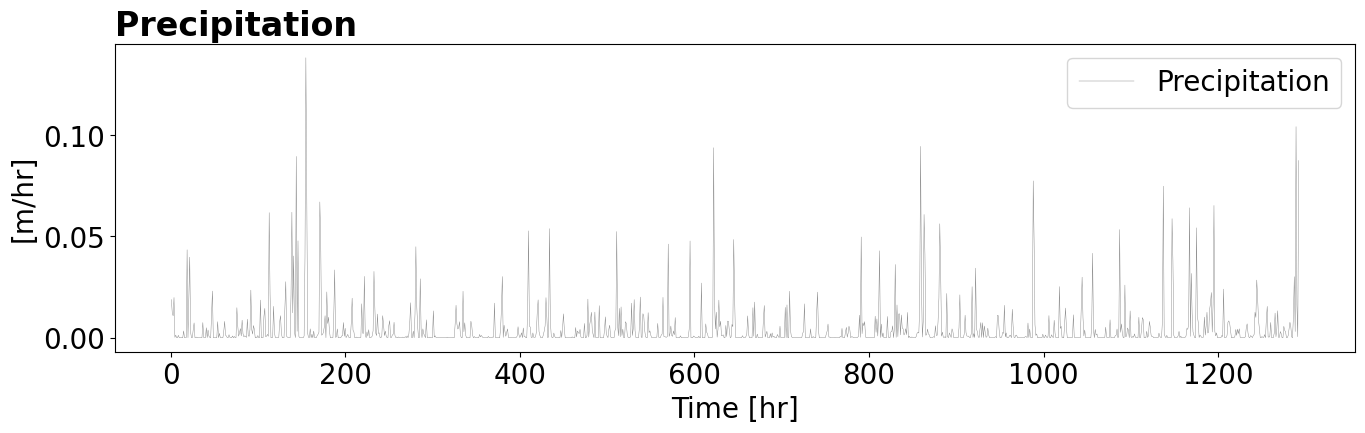

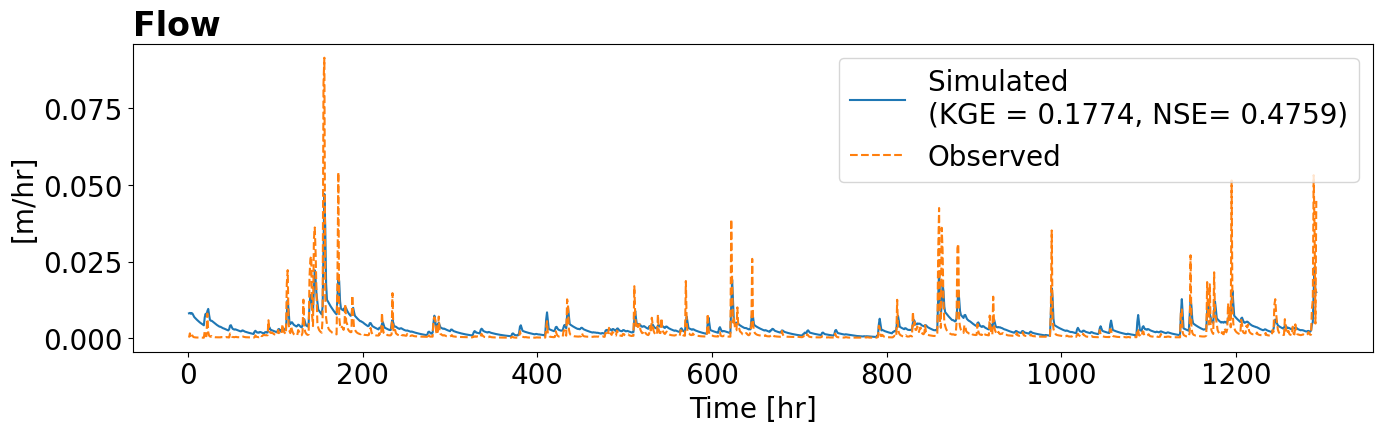

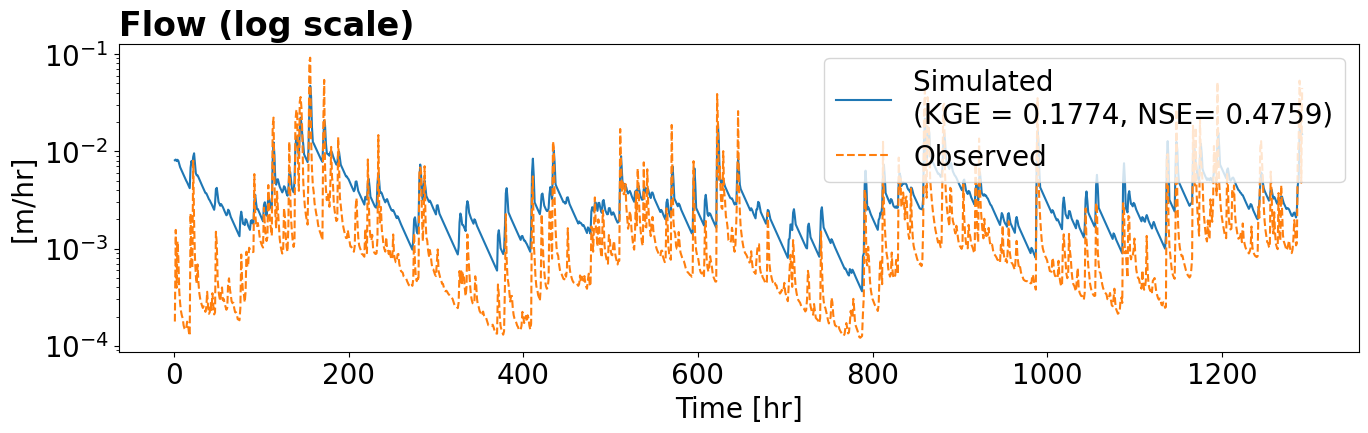

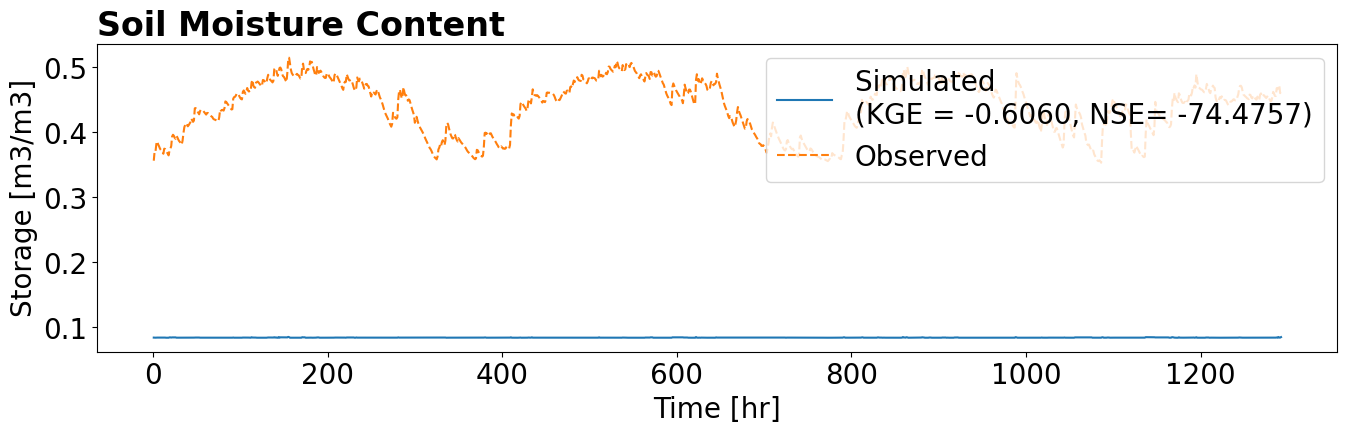

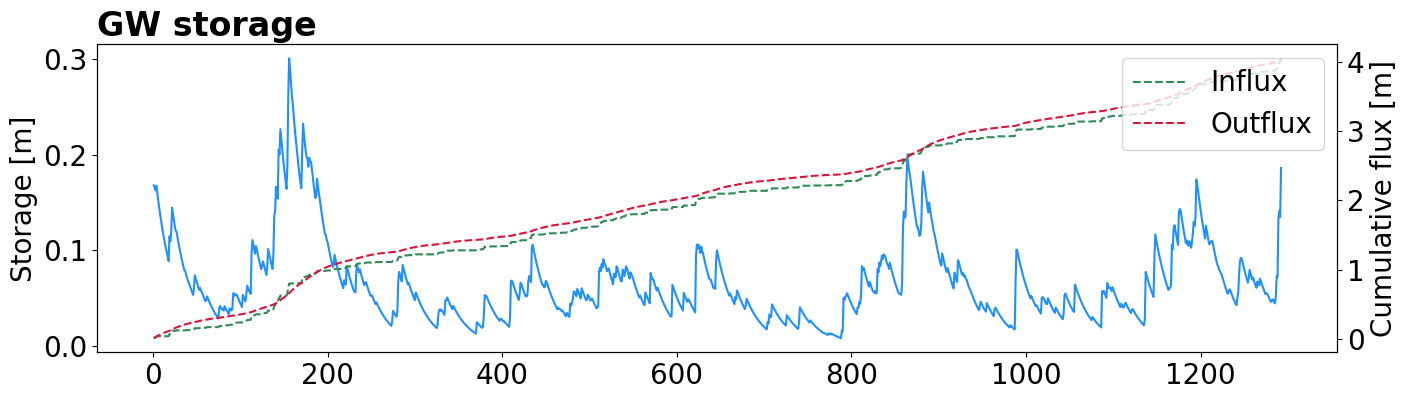

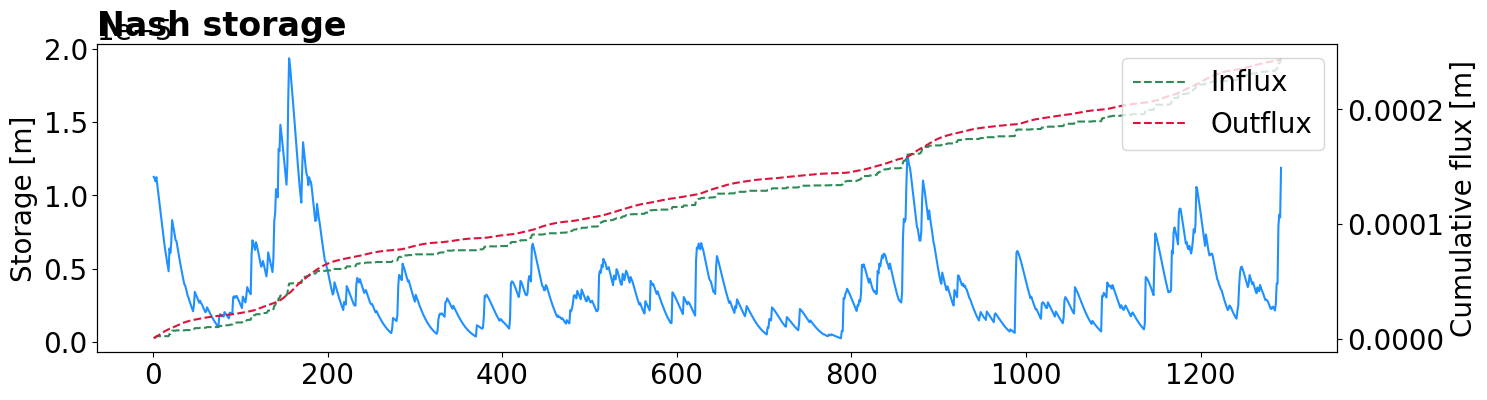

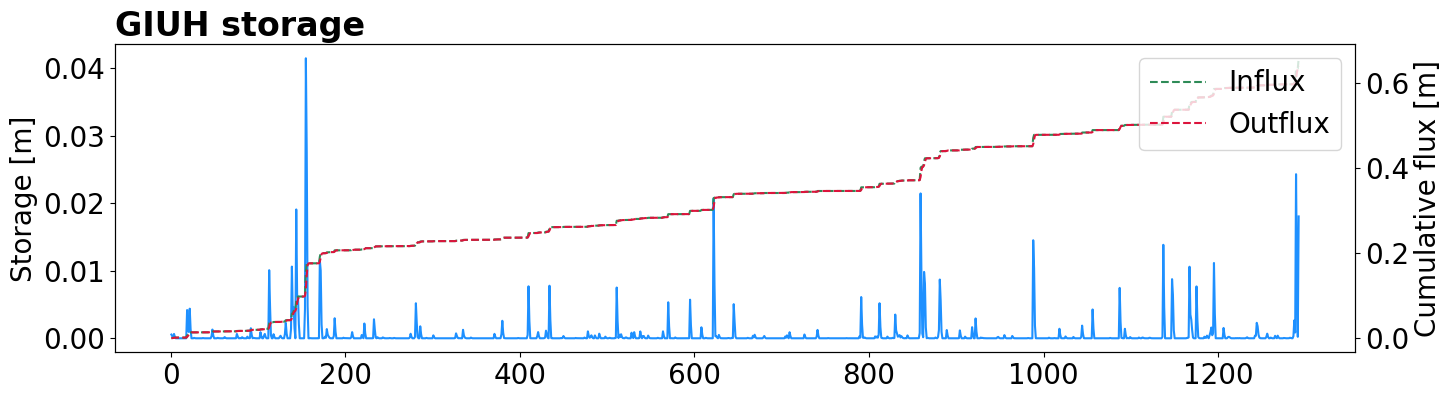


GLOBAL MASS BALANCE
      initial volume:   0.3401
        volume input:   5.9829
       volume output:   5.9829
        final volume:   0.3401
            residual: -7.1054e-15

 Discharge details
Cumulative discharge: 4.71
        Runoff ratio: 0.79
      Surface runoff: 0.14
  Deep GW to channel: 0.86
        Lateral flow: 0.00

 AET & PET
      volume PET:   4.0315
      volume AET:   1.2753
ET from rainfall:   1.2753
    ET from soil:   0.0000
    ET from gw:   0.0000

SCHAAKE MASS BALANCE
    volume input:   5.9829
ET from rainfall:   1.2753
  surface runoff:   0.6587
             IOF:   0.6587
             SOF:   0.0000
    infiltration:   4.0488
schaake residual: -4.4409e-15

GIUH MASS BALANCE
  vol. into giuh:   0.6587
   vol. out giuh:   0.6587
 vol. end giuh q:   0.0000
   giuh residual: 3.3307e-16

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.1705
  vol. into soil:   4.0488
vol.soil2latflow:   0.0002
 vol. soil to gw:   4.0486
 vol. soil to ET:   0.00

In [6]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 1293)),
    warm_up=True,
    warmup_offset=8000,
    warmup_iteration=10,
    verbose=True
)
cfe_instance.finalize(print_mass_balance=True)